## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data loading

In [2]:
# define the path and assign data frame to the "df" variable

path = r'C:\Users\Jakov\Achievement 6'

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_cleaned.csv'), index_col = 0)

## Data preparation

In [3]:
df.head()

,boat_type,manufacturer,type,year_built,length,width,material,location,views_last_7_days,old_currency,price_euro,country
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3493.24,Switzerland
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490.00,Germany
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3946.51,Switzerland
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,3475.67,Denmark
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399.00,Germany


In [4]:
df.isnull().sum() # check for null values

boat_type               0
manufacturer         1338
type                    6
year_built              0
length                  9
width                  56
material             1749
location               36
views_last_7_days       0
old_currency            0
price_euro              0
country                33
dtype: int64

In [5]:
df['length'].describe()

count    9879.000000
mean       11.570017
std         6.002820
min         1.040000
25%         7.470000
50%        10.280000
75%        13.930000
max       100.000000
Name: length, dtype: float64

In [6]:
df[df['length'].isnull()] # show all rows where 'length' is null

,boat_type,manufacturer,type,year_built,length,width,material,location,views_last_7_days,old_currency,price_euro,country
103,Fishing Boat,Orkney power boats,Used boat,2016,NaN,NaN,NaN,Switzerland Â» Einigen,393,CHF,10991.61,Switzerland
2363,Cabin Boat,Chris Craft power boats,Used boat,2014,NaN,NaN,NaN,Poland Â» split korcula croatia,194,EUR,209000.00,Poland
5949,"Flybridge,Motor Yacht",Princess power boats,"Used boat,Diesel",1995,NaN,NaN,Plastic,France Â» La Corse Â» Porto Vecchio,297,EUR,135000.00,France
6405,Wakeboard/Wakesurf,Nautique power boats,Used boat,2015,NaN,NaN,NaN,Portugal,154,EUR,100000.00,Portugal
7221,"Runabout,Sport Boat,Water ski",Boesch power boats,Used boat,1984,NaN,NaN,Wood,Switzerland Â» VierwaldstÃ¤ttersee Â» Kastanie...,480,CHF,78511.50,Switzerland
7373,Sport Boat,NaN,"Used boat,Electric",2012,NaN,NaN,GRP,Neusiedl am See,110,EUR,65000.00,Austria
7497,Runabout,Riva power boats,"Used boat,Unleaded",1990,NaN,NaN,GRP,Denmark Â» HolbÃ¦k,167,DKK,60253.96,Denmark
9301,Water ski,Correct Craft power boats,Used boat,2003,NaN,NaN,NaN,France Â» Sud-Ouest Â» Tremolat 24510,231,EUR,19800.00,France
9434,Bowrider,Suzuki power boats,Unleaded,2020,NaN,NaN,NaN,Germany Â» Nordrhein-Westfalen Â» WSC Hopp / M...,33,EUR,16950.00,Germany


In [7]:
df = df[df['length'].notnull()] # exclude all rows where "length" is null

In [8]:
df[df['length'].isnull()]

,boat_type,manufacturer,type,year_built,length,width,material,location,views_last_7_days,old_currency,price_euro,country


<Axes: xlabel='price_euro', ylabel='Count'>

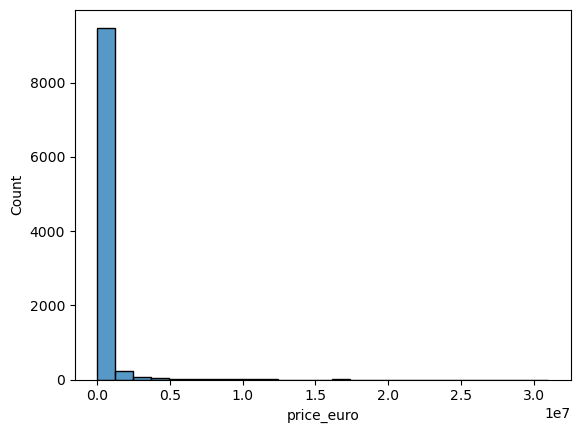

In [9]:
sns.histplot(df['price_euro'], bins=25) # Shows extreme values

<Axes: xlabel='length', ylabel='Count'>

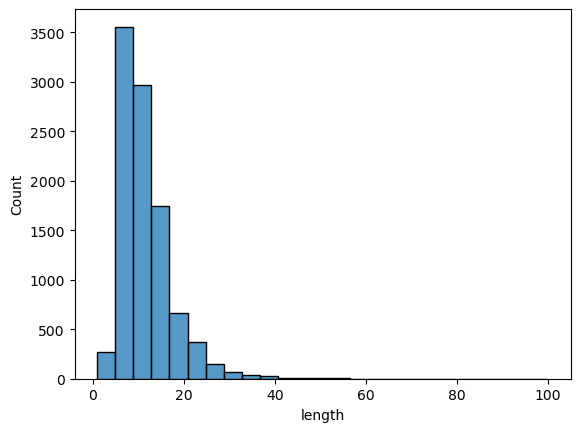

In [10]:
sns.histplot(df['length'], bins=25) # Shows extreme values

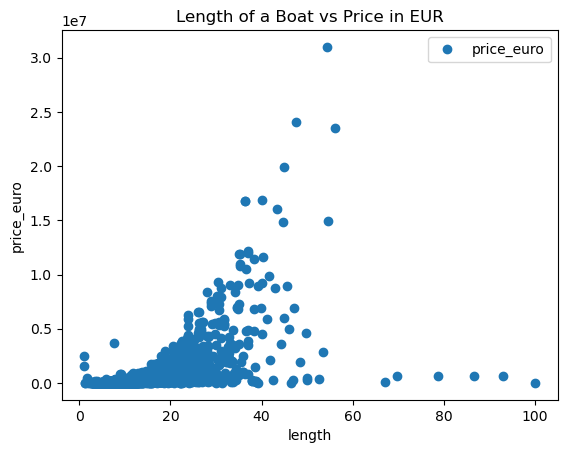

In [11]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'length', y='price_euro', style="o") 
plt.title('Length of a Boat vs Price in EUR')  
plt.xlabel('length')  
plt.ylabel('price_euro')  
plt.show()

## Hypothesis:
###                          The bigger the boat is, the more expensive it is.

In [12]:
# store values of the variables in array objects for scikit library
 
X = df['length'].values.reshape(-1,1)
y = df['price_euro'].values.reshape(-1,1)

## Regression Analysis

In [13]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
# create a regression object

regression = LinearRegression()

In [15]:
# fit the regression object onto the training sets

regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# predict the value of y using X_test

y_predicted = regression.predict(X_test)

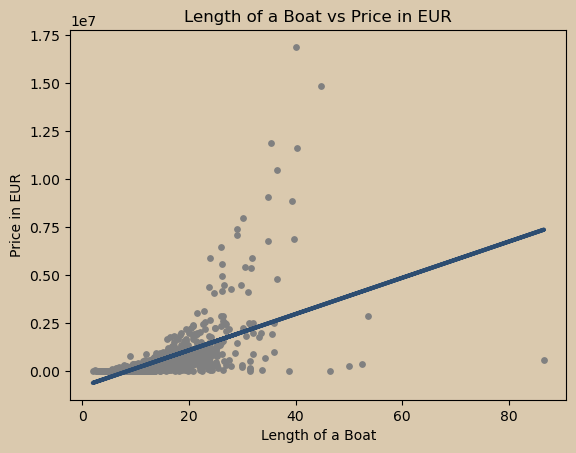

In [67]:
# plot the result of the model on the test set

fig, ax= plt.subplots()

plot_test = plt
ax.set_facecolor('#dac9ae')

fig.set_facecolor('#dac9ae')
plot_test.scatter(X_test, y_test, color='grey', s=15)
plot_test.plot(X_test, y_predicted, color='#2d4d71', linewidth=3)
plot_test.title("Length of a Boat vs Price in EUR")
plot_test.xlabel("Length of a Boat")
plot_test.ylabel("Price in EUR")
plot_test.show()

In [70]:
fig.savefig('output.jpg')

## 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

### The fit of a regression line to the test set is not accurate. Even at the length of a boat being 1m, it fails to predict an accurate price. At the length of about 10, it just starts to cover datapoints from the test. At the length of about 27-28, datapoints are getting drastically dispersed, and regression line is unable to cover that.

## 11. Check the model performance statistics—MSE and R2 score.

In [42]:
# create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [43]:
# print the model summary statistics

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[94328.34158159]]
Mean squared error:  449687305865.93945
R2 score:  0.32827413320806453


## 12. Compare the predicted y values with the actual y values in a dataframe.

In [48]:
y_predicted

array([[1948353.65446547],
       [ 100461.44288222],
       [-263645.9556227 ],
       ...,
       [ 453249.44039735],
       [ 348544.98124179],
       [ 348544.98124179]])

In [49]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten().round(2)})


data.head(30)

,Actual,Predicted
0,1495000.00,1948353.65
1,70000.00,100461.44
2,13800.00,-263645.96
3,79500.00,1103171.71
4,839000.00,1263529.89
5,59000.00,322133.05
6,280000.00,630586.72
7,16909.90,-27825.10
8,24900.00,15565.94
9,37900.00,-27825.10


## 13. Include your thoughts on how well the model performed on the test set in a markdown cell.

### I would say that model performed very poor and inaccurate. A differences between values in actual prices and predicted prices are too big. Those differences are confirmed by a RMSE of 449 687 305 865.93945, with the maximal value of a dependent variable being 31 000 000. A R2 score of 0.328 tells how model inaccurately explains the variance in the data. The possible data bias might lie in a fact that there are far less boats with the length over 28m, compared to the amount of boats with the length lesser than 28m. Perhaps the performance of the model would be more accurate if there was equal number of boats between those 2 groups.